<a href="https://colab.research.google.com/github/noeljaymon/COVID-19-detection-using-X-Ray-images/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = "/content/drive/My Drive/dataset"
CATEGORIES = ["normal", "covid"]

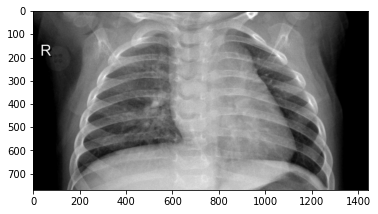

In [ ]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break
    break    



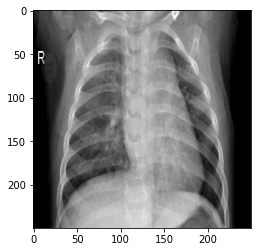

In [ ]:
IMG_SIZE = 250

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [ ]:
from tqdm import tqdm
create_training_data()
print(len(training_data))

100%|██████████| 26/26 [00:00<00:00, 39.17it/s]

50


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
1
0
0
1
1
0


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
y=np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(128))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:

model.fit(X, y, batch_size=5, epochs=25, validation_split=0.2)

Train on 40 samples, validate on 10 samples
Epoch 1/25
40/40 [==============================] - 14s 344ms/sample - loss: 5.1703 - acc: 0.6250 - val_loss: 0.5211 - val_acc: 0.8000
Epoch 2/25
40/40 [==============================] - 13s 335ms/sample - loss: 0.4314 - acc: 0.8250 - val_loss: 0.1267 - val_acc: 1.0000
Epoch 3/25
40/40 [==============================] - 13s 337ms/sample - loss: 0.2543 - acc: 0.9000 - val_loss: 0.4514 - val_acc: 0.7000
Epoch 4/25
40/40 [==============================] - 13s 337ms/sample - loss: 0.5673 - acc: 0.9000 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 5/25
40/40 [==============================] - 13s 334ms/sample - loss: 0.0385 - acc: 0.9750 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 6/25
40/40 [==============================] - 13s 335ms/sample - loss: 0.0194 - acc: 0.9750 - val_loss: 4.0834e-06 - val_acc: 1.0000
Epoch 7/25
40/40 [==============================] - 13s 334ms/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 8

In [ ]:
model.save('covid-19.h5')

In [ ]:
train_score = model.evaluate(X, y, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(X, y, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 4.467596590984613e-05
Train accuracy: 100.0
Test loss: 4.467596590984613e-05
Test accuracy: 100.0


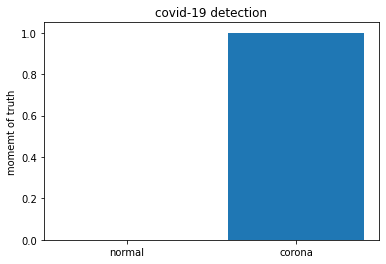

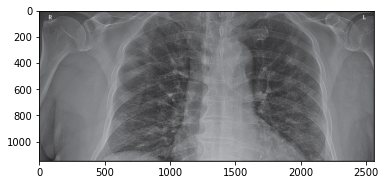

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
file = '/content/1-s2.0-S0140673620303706-fx1_lrg.jpg'
true_image = image.load_img(file)
#def emotion_analysis(emotions):
objects = ('normal', 'corona')
y_pos = np.arange(len(objects))
emotion=[0,1]
plt.bar(y_pos, emotion)

plt.xticks(y_pos, objects)
plt.ylabel('momemt of truth')
plt.title('covid-19 detection')
plt.show()
plt.imshow(true_image)       





In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt



file = '/content/1-s2.0-S0929664620300449-gr2_lrg-a.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(250, 250))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

#emotion_analysis(emotion)

x = np.array(x, 'float32')
x = x.reshape([250, 250]);

plt.gray()
plt.imshow(true_image)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


NameError: ignored

In [ ]:
print (custom)

[[0.99999964]]
